pip install tensorflow numpy matplotlib

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# โหลดข้อมูล MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# ปรับขนาดรูปภาพให้มีมิติเดียวกันและทำ normalization
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [ ]:
# show รูปภาพ 10 รูปแรก
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
model = models.Sequential()

# เลเยอร์ Convolutional และ MaxPooling ชั้นที่ 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# เลเยอร์ Convolutional และ MaxPooling ชั้นที่ 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# เลเยอร์ Convolutional ชั้นที่ 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten และ Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

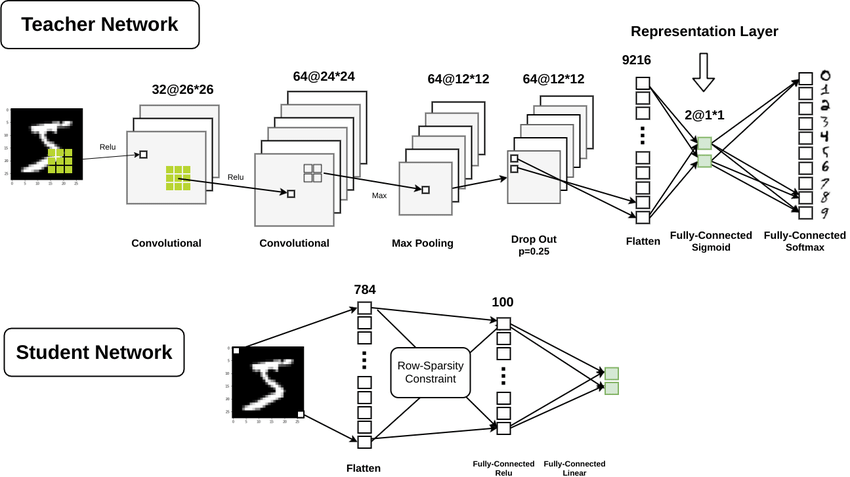

In [ ]:
model.summary()


In [ ]:
# display model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

# show model image plt
from PIL import Image
img = Image.open('model.png')
plt.figure(figsize=(20,20))
plt.imshow(img)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# ฝึกโมเดล
history = model.fit(train_images, train_labels, epochs=5, 
                    validation_data=(test_images, test_labels))


In [ ]:
# ประเมินผลโมเดล
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


In [ ]:
# แสดงผลการฝึก
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# ทดสอบโมเดล โดยใช้รูปภาพทดสอบ 10 รูปแรก
predictions = model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {test_labels[i]}, Predicted: {predictions[i].argmax()}')

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# โหลดข้อมูล MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# สร้างโมเดล CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# คอมไพล์และฝึกโมเดล
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, 
          validation_data=(test_images, test_labels))


In [ ]:
# ดึงค่าน้ำหนักของเลเยอร์ Convolutional ชั้นแรก
filters, biases = model.layers[0].get_weights()
print(filters.shape)  # ควรได้ (3, 3, 1, 32)


In [ ]:
# จำนวนฟิลเตอร์
num_filters = filters.shape[-1]

# ตั้งค่าขนาดของรูป
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

# วนลูปแสดงฟิลเตอร์แต่ละอัน
for i in range(num_filters):
    # ดึงฟิลเตอร์แต่ละอันออกมา
    f = filters[:, :, 0, i]
    # แสดงฟิลเตอร์
    axes[i].imshow(f, cmap='gray')
    axes[i].axis('off')

plt.tight_layout()
plt.show()
